<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Pulso_Unitario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Pulso Unitario

\begin{equation}
f(x)=
\begin{cases}
1 & \text{si } -1 \leq x \leq 1 \\
0 & \text{en otro caso }
\end{cases}
\end{equation}

a) Graficar la función pulso unitario

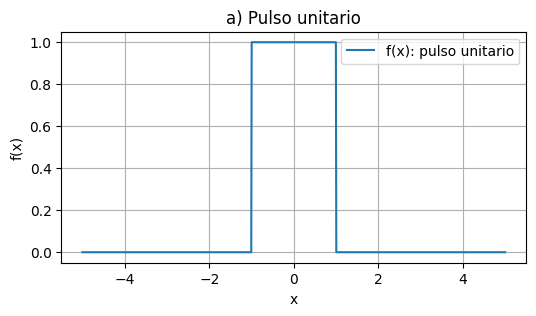

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Definir la función pulso unitario
def pulso_unitario(x):
    return np.where(np.abs(x) <= 1, 1, 0)

#Crear el dominio
x_vals = np.linspace(-5, 5, 1000)
y_vals = pulso_unitario(x_vals)

#Graficar
plt.figure(figsize=(6, 3))
plt.plot(x_vals, y_vals, label='f(x): pulso unitario')
plt.title("a) Pulso unitario")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


In [2]:
import sympy as sp

#Definir variables simbólicas
x, k = sp.symbols('x k', real=True)
f_k = sp.sin(k) / k
integral = sp.integrate(f_k * sp.cos(k*x), (k, 0, sp.oo))
fourier_f = (2 / sp.pi) * integral
fourier_f


2*Piecewise((pi*Piecewise((0, x**(-2) < 1), (1, x**2 < 1), (meijerg(((1,), (1/2,)), ((1/2,), (0,)), polar_lift(x)**(-2)), True))/2, Eq(Abs(arg(x)), 0) & Ne(x**(-2), 1)), (Integral(sin(k)*cos(k*x)/k, (k, 0, oo)), True))/pi

b) Representación mediante la integral de Fourier (forma simbólica con SymPy)

<ipython-input-6-1050468980>:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(lambda k: np.cos(k * x) * np.sinc(k / np.pi), 0, a)


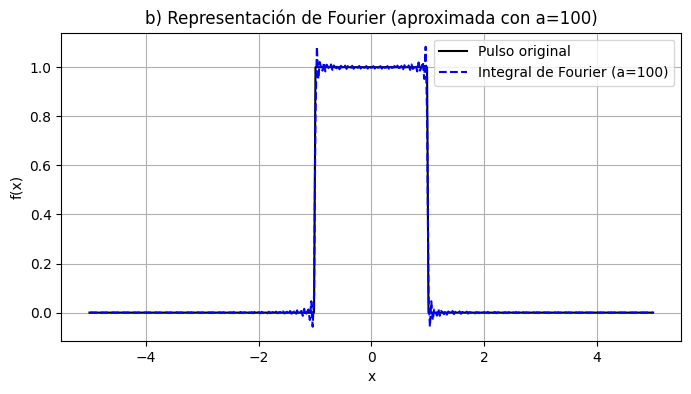

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#Función pulso original
def pulso_unitario(x):
    return np.where(np.abs(x) <= 1, 1, 0)

# Representación de Fourier con límite grande (a = 100)
def f_fourier_b(x_vals, a=100):
    result = []
    for x in x_vals:
        integral, _ = quad(lambda k: np.cos(k * x) * np.sinc(k / np.pi), 0, a)
        result.append((2 / np.pi) * integral)
    return np.array(result)

# Dominio y evaluación
x_vals = np.linspace(-5, 5, 400)
y_original = pulso_unitario(x_vals)
y_fourier_approx = f_fourier_b(x_vals)

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_original, label="Pulso original", color="black")
plt.plot(x_vals, y_fourier_approx, label="Integral de Fourier (a=100)", linestyle="--", color="blue")
plt.title("b) Representación de Fourier (aproximada con a=100)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


c) Aproximaciones usando límites finitos: a = 8, 16, 32

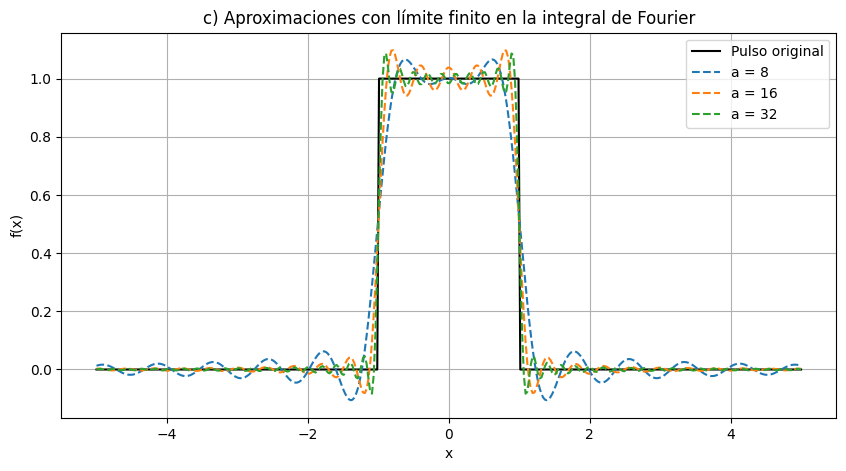

In [7]:
def f_fourier_c(x_vals, a):
    result = []
    for x in x_vals:
        integral, _ = quad(lambda k: np.cos(k * x) * np.sinc(k / np.pi), 0, a)
        result.append((2 / np.pi) * integral)
    return np.array(result)

#Evaluar con distintos valores de a
y_a8 = f_fourier_c(x_vals, a=8)
y_a16 = f_fourier_c(x_vals, a=16)
y_a32 = f_fourier_c(x_vals, a=32)

#Gráfica
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_original, label="Pulso original", color="black")
plt.plot(x_vals, y_a8, label="a = 8", linestyle="--")
plt.plot(x_vals, y_a16, label="a = 16", linestyle="--")
plt.plot(x_vals, y_a32, label="a = 32", linestyle="--")
plt.title("c) Aproximaciones con límite finito en la integral de Fourier")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
